# Sprawozdanie lab 2
## Dominik Stanaszek

In [1890]:
import numpy as np
import pprint as pp
import networkx as nx
import matplotlib.pyplot as plt
from numpy.linalg import inv
import sympy as sp

# Task 1

# Gauss-Jordan Method

In [1891]:
def Gauss_Jordan(n, matrix):
    for i in range(n):
        for j in range(i + 1, n):
            mji = - matrix[j][i] / matrix[i][i]
            newRj = matrix[j] + matrix[i] * mji
            matrix[j] = newRj
            
    for i in range(n - 1, -1, -1):
        for j in range(i - 1, -1, -1):
            mji = - matrix[j][i] / matrix[i][i]
            newRj = matrix[j] + matrix[i] * mji
            matrix[j] = newRj

In [1892]:
matrix = np.random.rand(5, 6)

In [1893]:
print(matrix)

[[ 0.33770809  0.2944001   0.87379215  0.24328784  0.66497389  0.30512346]
 [ 0.67905745  0.29639006  0.98478527  0.86361844  0.44786103  0.19773637]
 [ 0.4334794   0.36776333  0.16116789  0.0393352   0.62948721  0.35903368]
 [ 0.00648687  0.77185086  0.08864899  0.84447745  0.93757591  0.2595197 ]
 [ 0.23149745  0.27321076  0.09831091  0.94785739  0.4575285   0.45226523]]


In [1894]:
Gauss_Jordan(5, matrix)
print(matrix)

[[  3.37708086e-01   0.00000000e+00   0.00000000e+00  -5.52887258e-17
    3.01248254e-17   8.55941364e-02]
 [ -9.50181807e-17  -2.95584468e-01   0.00000000e+00  -5.55111512e-17
    5.29202672e-18   4.59512960e-01]
 [ -5.52504055e-17   1.59133065e-18  -9.33969610e-01   0.00000000e+00
    1.45404865e-17   3.14913479e-01]
 [  2.19398862e-17  -2.68953485e-18   0.00000000e+00   2.40083955e+00
   -1.11022302e-16   5.62372964e-01]
 [ -1.03597966e-16   3.38715205e-19   0.00000000e+00   0.00000000e+00
    3.71022555e-01   5.10433433e-01]]


# Task 2

# LU Decomposition

In [1895]:
def scale(matrix):
    scale_ratio = matrix.max()
    return matrix / scale_ratio, scale_ratio

def pivot(matrix, i, P):
    max_ind = matrix[i:, i].argmax() + i
    
    tmp = np.copy(matrix[max_ind])
    matrix[max_ind] = matrix[i]
    matrix[i] = tmp

    tmp = np.copy(P[max_ind])
    P[max_ind] = P[i]
    P[i] = tmp
    
    return matrix, P

def LU_factorization(mat, scaled=True, pivoted=True):
    n, n = mat.shape
    matrix = np.copy(mat) # we copy, to be able to then compare matrices
    P = np.zeros((n, n), np.float64)
    np.fill_diagonal(P, 1)
    
    if scaled:
        matrix, ratio = scale(matrix)
    for i in range(n):
        if pivoted:
            matrix, P = pivot(matrix, i, P)
        for j in range(i + 1, n):
            mji = - matrix[j][i] / matrix[i][i]
            matrix[j][i:n] = matrix[j][i:n] + matrix[i][i:n] * mji
            matrix[j][i] = - mji
    L = np.copy(matrix)
    U = np.copy(matrix)
    
    for i in range(n):
        for j in range(i + 1, n):
            U[j][i] = np.float64(0)
    
    for i in range(n - 1, -1, -1):
        for j in range(i, -1, -1):
            if i == j:
                L[j][i] = np.float64(1)
            else:
                L[j][i] = np.float64(0)
    if scaled:
        return L, U, P, ratio
    return L, U, P

### Test

In [1896]:
A = np.random.rand(5, 5)
A[0][0] = 5
print("A:")
pp.pprint(A)

L, U, P, ratio = LU_factorization(A, True, True)

# We check the results - matrices L, U, their inner product
print("L:")
pp.pprint(L)

print("U:")
pp.pprint(U)

print("P:")
pp.pprint(P)

print("L * 8 dot U:") # because 8 is the scaling ratio
LU = np.dot(L * ratio, U)
pp.pprint(LU)
PA = np.dot(P, A)
print("PA:")
pp.pprint(PA)

A:
array([[ 5.        ,  0.23524766,  0.59324141,  0.20959483,  0.51310697],
       [ 0.09050687,  0.12728329,  0.65444254,  0.60391033,  0.23614262],
       [ 0.12866289,  0.85057299,  0.09585863,  0.15437626,  0.88833585],
       [ 0.28587449,  0.21972666,  0.14211491,  0.64173527,  0.6983261 ],
       [ 0.58566692,  0.55115629,  0.6101541 ,  0.64429292,  0.2625201 ]])
L:
array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.02573258,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.01810137,  0.14567454,  1.        ,  0.        ,  0.        ],
       [ 0.0571749 ,  0.24425299,  0.14005758,  1.        ,  0.        ],
       [ 0.11713338,  0.61999866,  0.77646575,  0.15273716,  1.        ]])
U:
array([[ 1.        ,  0.04704953,  0.11864828,  0.04191897,  0.10262139],
       [ 0.        ,  0.16890389,  0.0161186 ,  0.02979657,  0.17502646],
       [ 0.        ,  0.        ,  0.12639274,  0.11568267,  0.01987404],
       [ 0.        ,  0.   

# Task 3

##  Electrical network analysis

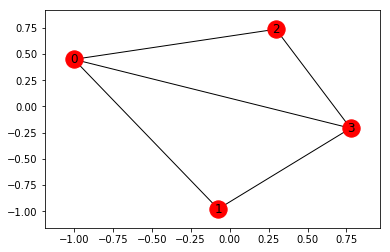

[(0, 1, {'weight': 10.0}), (0, 2, {'weight': 20.0}), (0, 3, {'weight': 0}), (1, 3, {'weight': 30.0}), (2, 3, {'weight': 40.0})]


In [1897]:
G = nx.read_edgelist("example_circuit.csv", delimiter=",", data=[("weight", float)])
G = nx.relabel_nodes(G, lambda x: int(x))  # relabel nodes to be integers
[s, t, E] = np.genfromtxt('example_SEM.csv', dtype=int, delimiter=',')  # load SEM
G.add_edge(s, t, weight=0)
nx.draw_networkx(G)
plt.show()
print(G.edges(data=True))
# drawaing with SEM

Generate matrix A 
Rows are nodes and columns are currents (edges)
if at A[i][j] is:
    - (-1) means current Ij for node i-th is going out, 
    - 1 means current Ij for node i-th is going out
    - 0 means that node to node i-th current Ij is not going in or out (the edge has not got its endings in i-th node)

In [1898]:
# We are assuming some current direction (our assumption - from lower node to higher node)
A = np.zeros((len(G.nodes), len(G.edges)))
print(G.nodes)
counter = 0
for i in G.edges:
    lower = min(i[0], i[1])
    higher = max(i[0], i[1])
    A[lower][counter] = 1
    A[higher][counter] = -1
    G[i[0]][i[1]]['edge_label'] = counter
    counter += 1
A

[0, 1, 2, 3]


array([[ 1.,  1.,  1.,  0.,  0.],
       [-1.,  0.,  0.,  1.,  0.],
       [ 0., -1.,  0.,  0.,  1.],
       [ 0.,  0., -1., -1., -1.]])

A * I = U

I = U * A^(-1)

In [1899]:
def has_SEM(c):
    if (c[0] == s and c[-1] == t) or (c[0] == t and c[1] == s):
        return True
    for i in range(len(c) - 1):
        if (c[i] == s and c[i + 1] == t) or (c[i] == t and c[i + 1] == s):
            return True
    return False

A = A[1:]

cycles = nx.cycle_basis(G)

U = np.zeros((len(G.edges), 1))

counter = A.shape[0] - 1

for c in cycles:
    new_row = np.zeros((1, A.shape[1]))
    if has_SEM(c):
            U[counter+1][0] = E
    for i in range(0, len(c)):
        if i == len(c) - 1:
            column = G[c[i]][c[0]]['edge_label']
            new_row[0][column] = G[c[i]][c[0]]['weight']
        else:
            column = G[c[i]][c[(i + 1)]]['edge_label']
            new_row[0][column] = G[c[i]][c[i + 1]]['weight']
    counter += 1
    A = np.concatenate((A, new_row), axis=0)
    if counter == A.shape[1]:
        break
A

array([[ -1.,   0.,   0.,   1.,   0.],
       [  0.,  -1.,   0.,   0.,   1.],
       [  0.,   0.,  -1.,  -1.,  -1.],
       [ 10.,   0.,   0.,  30.,   0.],
       [  0.,  20.,   0.,   0.,  40.]])

In [1900]:
np.linalg.solve(A, U)

array([[ 2.5       ],
       [ 1.66666667],
       [-4.16666667],
       [ 2.5       ],
       [ 1.66666667]])

### Nodal analysis network

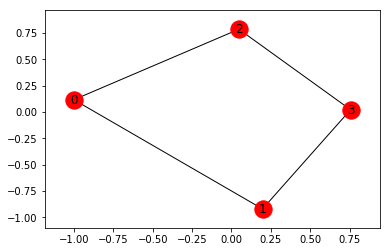

In [1901]:
c_graph = nx.read_edgelist("example_circuit2.csv", delimiter=" ", data=[("weight", float)])
c_graph = nx.relabel_nodes(c_graph, lambda x: int(x))
[s, t, E] = np.genfromtxt('example_SEM2.csv', dtype=int, delimiter=',')  # load SEM
nx.draw_networkx(c_graph)
plt.show()
# drawaing without SEM

In [1902]:
ref_node = s    # By our convention the reference node is the first SEM's node
given_voltage_node = t

In [1903]:
G = np.zeros((len(c_graph.nodes()), len(c_graph.nodes()))) # Transimntation matrix

In [1904]:
for i in c_graph.nodes():          # fill it in
    for j in c_graph.neighbors(i):
        G[i][i] += 1 / c_graph[i][j]['weight']
        G[i][j] = - 1 / c_graph[i][j]['weight']

In [1905]:
extra_row = np.zeros((G.shape[0]))          # Let's add row and column in which we know 
extra_row[given_voltage_node] = -1          # the voltage because it is the one that SEM is
G = np.vstack((G, extra_row))               # connected to
extra_column = np.zeros((G.shape[0], 1))
extra_column[given_voltage_node] = 1
G = np.hstack((G, extra_column))

In [1906]:
G = np.delete(G, ref_node, 0)      # Delete row and column connected to the reference node
G = np.delete(G, ref_node, 1)

In [1907]:
I = np.zeros(G.shape[1])          # constant term vector
I[G.shape[1] - 1] = E

In [1908]:
V = np.linalg.solve(G, I)        # voltage vector in nodes

In [1909]:
V = np.insert(V, ref_node, 0, axis=0)  # Add zero voltage in reference node
V = np.delete(V, V.shape[0] - 1, 0)    # and delete current in the branch with SEM

In [1910]:
voltages = np.zeros((len(c_graph.nodes()), len(c_graph.nodes())))      # Matrix of voltages between nodes

In [1911]:
for k in c_graph.nodes():                       # fill it in
    for j in range(k, len(c_graph.nodes())):
        voltages[k][j] = V[k] - V[j]
        voltages[j][k] = V[j] - V[k]

In [1912]:
for e in c_graph.edges():    # Add currents in specific branches to the graph
    i = e[0]
    j = e[1]
    c_graph[i][j]['current'] = voltages[i][j] / c_graph[i][j]['weight']

In [1913]:
for edge in c_graph.edges():
    print(edge, c_graph[edge[0]][edge[1]]['current'])

(0, 1) 2.5
(0, 2) 1.66666666667
(1, 3) 2.5
(2, 3) 1.66666666667
